## Introduction

In this activity we will use python to better understand the advection-dispersion equation and plot some of the solutions.

In [17]:
# Import the neccesary libraries
# Import only the scipy.special.erfc (complementary error function) and 
#     scipy.special.erf (error function) from the scipy Library
from scipy.special import erfc as erfc
from scipy.special import erf as erf
import numpy as np
import math
import matplotlib.pyplot as plt

## Model setup

Now let's define some of the characteristics of the system that we want to model. For conceptual simplicity lets imagine a homogenous sand column, similiar to the ones you worked with in lab in GEOSCI/GEOENG 627. First define the initial (t=0) conditions and boundary conditions (inlet and outlet).

In [18]:
# length of experiment (time in seconds)
experiment_length = 60*30;
# define a time vector to calculate the analytical solution at many different times at once (this is vectorization!)
t = np.linspace(0.1, experiment_length, num=100)
# Injection rate (mL/min)
q = 5
# Injected concentration
C0 = 1
# Initial concentration
Ci = 0

Now lets define some (arbitrary) column properties

In [19]:
# Column length (cm)
x = 10
col_radius = 2.5
# porosity
phi = 0.3;
# dispersivity [cm] 
dispersivity = 0.3 

Note that the 'dispersivity' is the alpha in the equations from the course notes. This must be multiplied by the advection velocity to get dispersion. Lets calculate the dispersion.

In [32]:
# calculate advection velocity
area = math.pi*(col_radius)**2
v = q/60/area/phi # divide by 60 to get flow rate from cm/min to cm/sec
print("advection velocity: " + str(v))

# Dispersion
D = v*dispersivity

4.43113462726379
advection velocity: 0.014147106052612919


#### What are the units of dispersion again?

## Analytical solution: Type 1 boundary conditions and continous solute injection

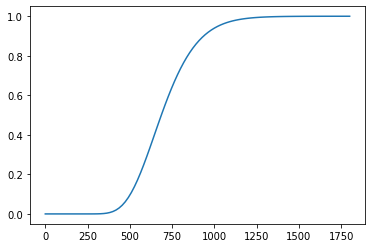

In [21]:
# Analytical solution: See lecture slides or (Parker and van Genuchten, 1984) for details
# Note that the '\' means continued on the next line
Conc_time_type1 = (1/2)*erfc((x - v*t)/(2*np.sqrt(D*t))) + \
    (1/2)*np.exp(v*x/D)*erfc((x + v*t)/(2*np.sqrt(D*t)))

# Plot the results as a function of time
plt.plot(t, Conc_time_type1)

#### What do we call this plot again? Label the axis...

## Analytical solution: Type 3 boundary conditions and continous solute injection

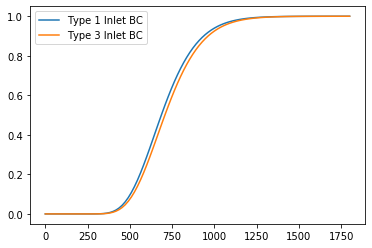

In [23]:
# Analytical solution: See lecture slides or (Parker and van Genuchten, 1984 eq 9b) for details
Conc_time_type3 = (1/2)* erfc((x - v*t)/(2* np.sqrt(D*t))) + \
    np.sqrt((v**2*t)/(math.pi*D))* np.exp(-(x - v*t)**2/(4*D*t)) - \
    (1/2)*(1 + (v*x/D) + (v**2*t/D))* np.exp(v*x/D)* erfc((x + v*t)/(2* np.sqrt(D*t)))

# Plot the results as a function of time
c1, = plt.plot(t, Conc_time_type1, label='Type 1 Inlet BC')
c2, = plt.plot(t, Conc_time_type3, label='Type 3 Inlet BC')

# Format the plots
plt.legend(handles=[c1, c2])

## Activity:
Using this code, evaluate the how the shape of the curves depends on the dispersion. Describe and discuss what you see.

Next, use the principle of superposition to analytically describe a finite pulse of solute, as opposed to the continuous injection currently being modeled. See Parker and van Genuchten, 1984 eq 9a and 18a for a good starting point.